# Analysis


1. Based on the Latitude vs. Cloudiness plot, there does not seem to be a clear correlation between the cities' latitude values and cloudiness percentage.
2.  Based on the Latitude vs. Max Temp plot, the temperature of cities increase closer to the equator.  This matches up directly with our previous assumption.  
3.  Latitude values and wind speed do no have a direct correlation.  

In [35]:
# Import Dependencies
from citipy import citipy
import openweathermapy.core as ow
import random
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn")

# Generate Cities List

In [36]:
# Write a simple for loop to fill these arrays to and eventually make a data frame with these
cities = []
lat = []
lng = []

for x in range (1500):    
    # Randomly generate Latitude 
    lat_coor = np.random.uniform(low=-90.00, high=90.00)
    # Randomly generate Longitude
    lng_coor = np.random.uniform(low=-180.00, high=180.00)
    # Use your coordinates to generate a city
    city = citipy.nearest_city(lat_coor, lng_coor)
    lat.append(lat_coor)
    lng.append(lng_coor)
    cities.append(city.city_name)

In [37]:
# drop duplicate cities
cities = set(cities)

print(len(cities))

611


# Perform API Calls


In [38]:
# Import api_key
api_key = "a98db3e0dcc65713ede6922907e5fd28"
settings = {"units": "imperial", "appid": api_key}

In [39]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
wnd = []
humid = []
cloud = []
date = []
name = []

# Get current weather
cities =list(cities)
for city in cities:
    try:
        current_weather = ow.get_current(city, **settings)  
        name.append(current_weather["name"])
        lat.append(current_weather["coord"]["lat"])
        lng.append(current_weather["coord"]["lon"])
        temp.append(current_weather["main"]["temp_max"])
        wnd.append(current_weather["wind"]["speed"])
        cloud.append(current_weather["clouds"]["all"])
        humid.append(current_weather["main"]["humidity"])
        date.append(current_weather["dt"]) 
        print(url)
    except: 
        pass

In [40]:
# create a data frame from cities, cloudiness, date, humidity, lat, lng, max temp, wind speed
weather_dict = {
        "City": name,
        "Cloudiness": cloud,
        "Date": date,
        "Humidity": humid,
        "Lat": lat,
        "Lng": lng,
        "Max Temp": temp,
        "Wind Speed": wnd
}

In [41]:
# weather_data = pd.DataFrame({'Cloudiness':weather_dict['Cloudiness']})
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Raudeberg,0,1527909600,93,61.99,5.14,57.20,5.82
1,Palmer,40,1527908160,48,61.60,-149.11,64.40,1.36
2,Ishigaki,75,1527908400,88,24.34,124.16,80.60,10.29
3,Lishui,92,1527911346,81,28.45,119.91,68.50,2.48
4,Colac,68,1527911070,86,-38.34,143.59,54.10,3.04
5,Kastamonu,0,1527911346,88,41.38,33.78,41.22,2.48
6,Coihaique,90,1527908400,92,-45.58,-72.07,19.40,1.12
7,Marquette,1,1527909480,70,46.54,-87.40,44.60,10.29
8,Watsa,36,1527911347,94,3.04,29.53,63.45,2.71
9,Saint George,0,1527909600,45,39.45,22.34,68.00,4.70


In [42]:
#Write DataFame to csv
weather_data.to_csv("City_Weather_data.csv")

# Latitude vs. Temperature Plot 

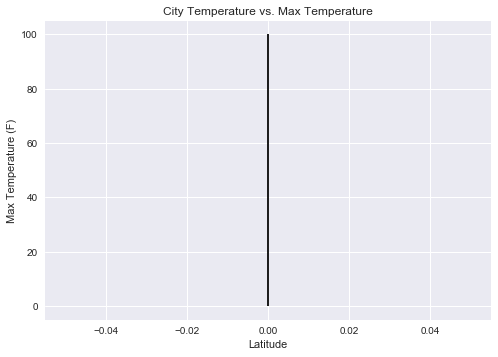

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Temperature vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.vlines(0,0,100)
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperature.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

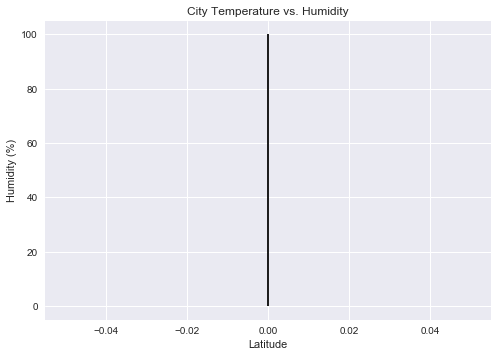

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Temperature vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.vlines(0,0,100)
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumidity.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

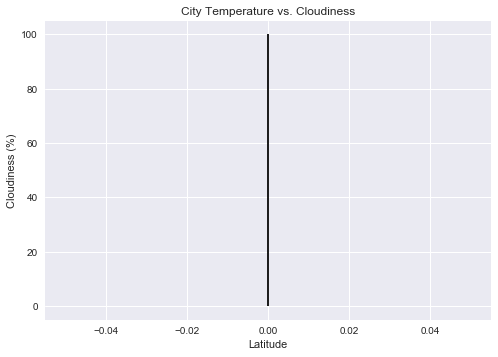

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Temperature vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.vlines(0,0,100)
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

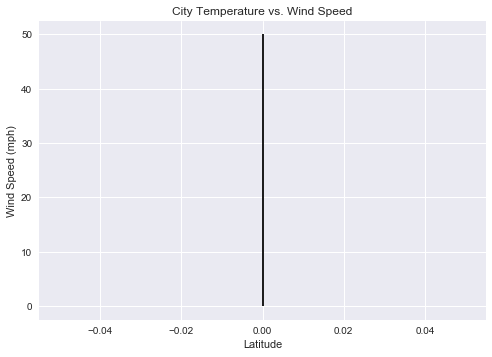

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Temperature vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.vlines(0,0,50)
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsWindSpeed.png")

# Show plot
plt.show()